# Script Contents
#### .01 Import Libraries & Data
#### .02 Prepare Data for Hierarchical Clustering
#### .03 Run Hierarchical Clustering on Unscaled Data
#### .04 Run Hierarchical Clustering on Scaled Data
#### .04 Principal Component Analysis
#### .05 Export Reduced Data

## .01 Import Libraries & Data

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [99]:
#Create a path to where data is stored
path = r'C:\Users\jacks\ClimateWins\02 Data Sets'

In [100]:
# Import weather data
df_weather = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [101]:
# Import pleasant days data
df_pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

## .02 Prepare Data for Hierarchical Clustering

In [103]:
#Reducing dataset to 2021
df_twentyone = df_weather[df_weather['DATE'].astype(str).str.startswith('2021')]
df_twentyone

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22281,20210101,1,8,1.0,0.88,1.0093,0.19,0.00,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22282,20210102,1,8,1.6,0.86,1.0114,0.01,0.00,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22283,20210103,1,8,1.1,0.88,1.0123,0.01,0.00,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22284,20210104,1,8,1.8,0.80,1.0123,0.14,0.00,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22285,20210105,1,8,1.3,0.76,1.0130,0.02,0.00,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22641,20211227,12,5,2.1,0.91,1.0049,0.21,0.20,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22642,20211228,12,7,2.1,0.73,1.0039,0.15,0.22,0,0.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22643,20211229,12,8,2.1,0.86,1.0139,0.18,0.82,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22644,20211230,12,7,2.1,0.85,1.0234,0.38,0.00,0,0.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [104]:
# Scale df_twentytens
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_twentyone))
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,-1.644406,-1.602745,1.116763,-1.035256,1.091754,-1.160716,-1.262110,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
1,-1.641508,-1.602745,1.116763,-0.286012,0.922544,-0.887378,-1.453945,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
2,-1.638609,-1.602745,1.116763,-0.910382,1.091754,-0.770233,-1.453945,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
3,-1.635711,-1.602745,1.116763,-0.036265,0.414913,-0.770233,-1.315397,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
4,-1.632812,-1.602745,1.116763,-0.660634,0.076492,-0.679120,-1.443287,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0


In [105]:
# Create columns for scaled data
columns=df_twentyone.columns.values.tolist()
df_scaled.columns=columns

In [106]:
df_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.644406,-1.602745,1.116763,-1.035256,1.091754,-1.160716,-1.262110,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
1,-1.641508,-1.602745,1.116763,-0.286012,0.922544,-0.887378,-1.453945,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
2,-1.638609,-1.602745,1.116763,-0.910382,1.091754,-0.770233,-1.453945,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
3,-1.635711,-1.602745,1.116763,-0.036265,0.414913,-0.770233,-1.315397,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
4,-1.632812,-1.602745,1.116763,-0.660634,0.076492,-0.679120,-1.443287,-0.512268,-0.200687,-1.068511,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0


In [107]:
# Drop the date and month columns in the scaled data
df_scaled_nodate = df_scaled.drop(['DATE','MONTH'], axis=1)
df_scaled_nodate.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1.116763,-1.035256,1.091754,-1.160716,-1.262110,-0.512268,-0.200687,-1.068511,-1.208138,-0.822909,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
1,1.116763,-0.286012,0.922544,-0.887378,-1.453945,-0.512268,-0.200687,-1.068511,-1.322724,-0.869699,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
2,1.116763,-0.910382,1.091754,-0.770233,-1.453945,-0.512268,-0.200687,-1.068511,-1.494603,-1.088053,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
3,1.116763,-0.036265,0.414913,-0.770233,-1.315397,-0.512268,-0.200687,-1.068511,-1.437310,-1.072456,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
4,1.116763,-0.660634,0.076492,-0.679120,-1.443287,-0.512268,-0.200687,-1.068511,-1.494603,-1.041263,...,0.0,-1.110223e-16,-2.220446e-16,4.440892e-16,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0


In [108]:
# Drop the date and month columns in the unscaled data
df_unscaled = df_twentyone.drop(['DATE','MONTH'], axis=1)
df_unscaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22281,8,1.0,0.88,1.0093,0.19,0.0,0,0.0,2.2,1.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22282,8,1.6,0.86,1.0114,0.01,0.0,0,0.0,1.4,0.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22283,8,1.1,0.88,1.0123,0.01,0.0,0,0.0,0.2,-0.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22284,8,1.8,0.80,1.0123,0.14,0.0,0,0.0,0.6,-0.5,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22285,8,1.3,0.76,1.0130,0.02,0.0,0,0.0,0.2,-0.3,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [109]:
# Reset df_unscaled index
df_unscaled = df_unscaled.reset_index()
df_unscaled = df_unscaled.drop(['index'], axis=1)
df_unscaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,8,1.0,0.88,1.0093,0.19,0.0,0,0.0,2.2,1.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
1,8,1.6,0.86,1.0114,0.01,0.0,0,0.0,1.4,0.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
2,8,1.1,0.88,1.0123,0.01,0.0,0,0.0,0.2,-0.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
3,8,1.8,0.80,1.0123,0.14,0.0,0,0.0,0.6,-0.5,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
4,8,1.3,0.76,1.0130,0.02,0.0,0,0.0,0.2,-0.3,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


## .03 Run Hierarchical Clustering on Unscaled Data

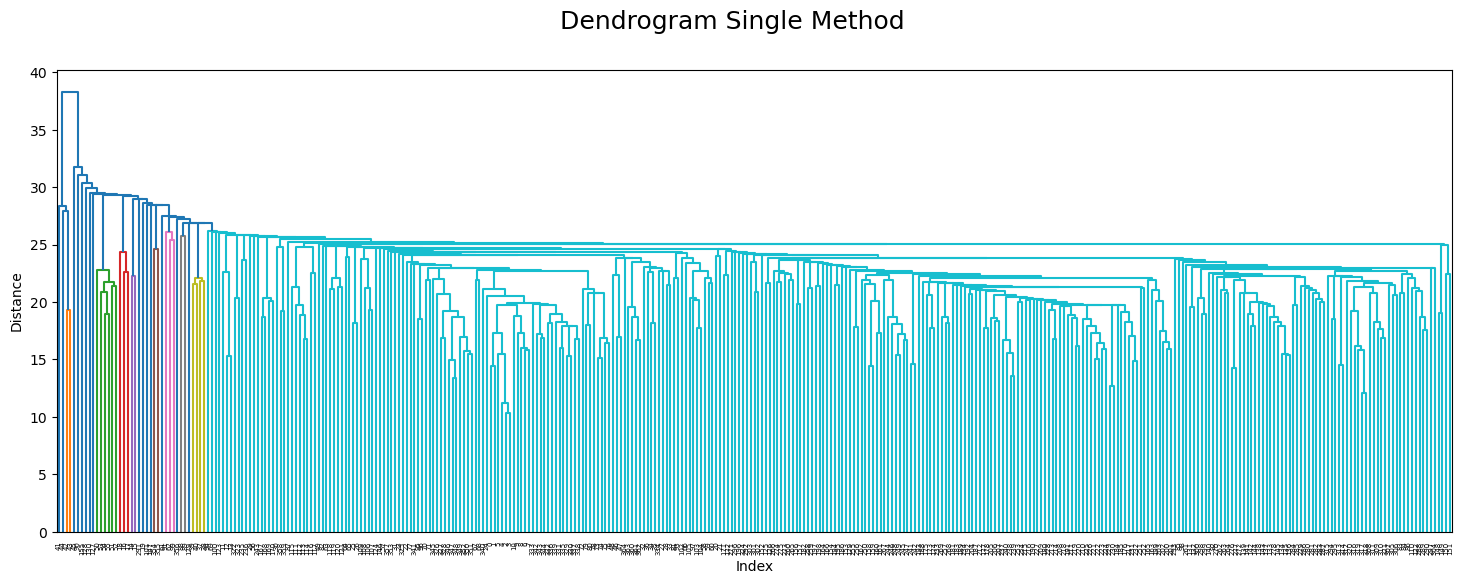

In [122]:
# Dendrogram Single Method
distance_single = linkage(df_unscaled, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

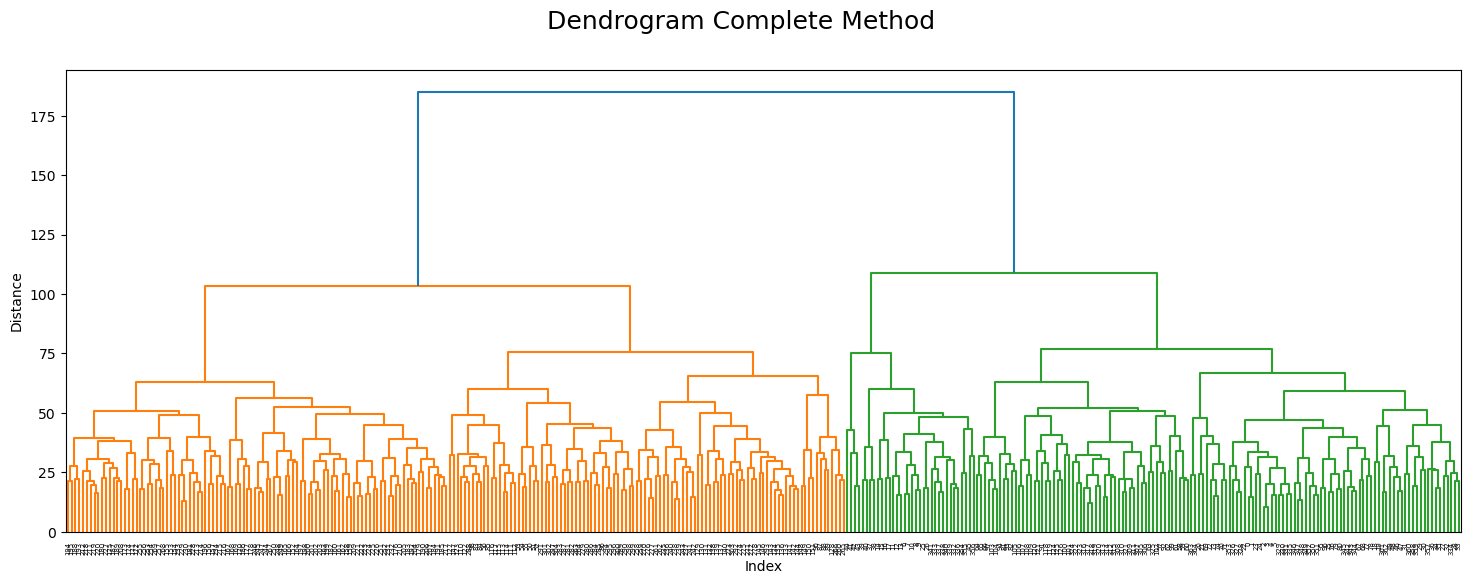

In [124]:
# Dendrogram Complete Method
distance_complete = linkage(df_unscaled, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

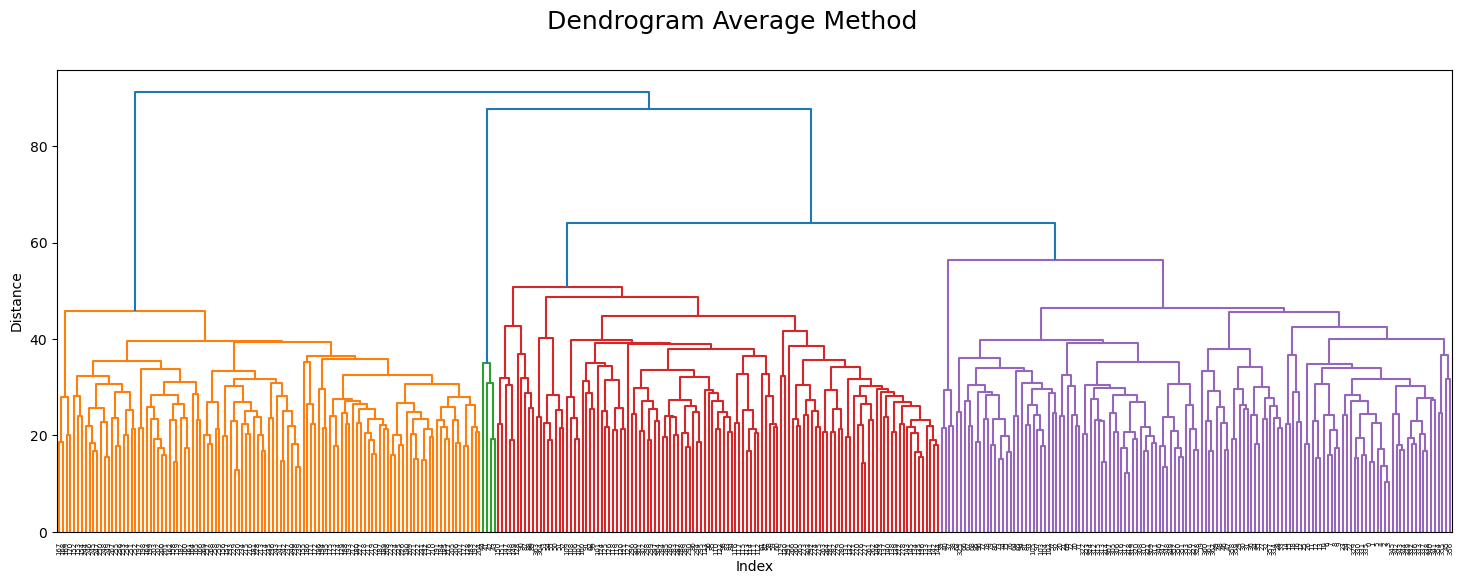

In [126]:
# Dendrogram Average Method
distance_average = linkage(df_unscaled, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

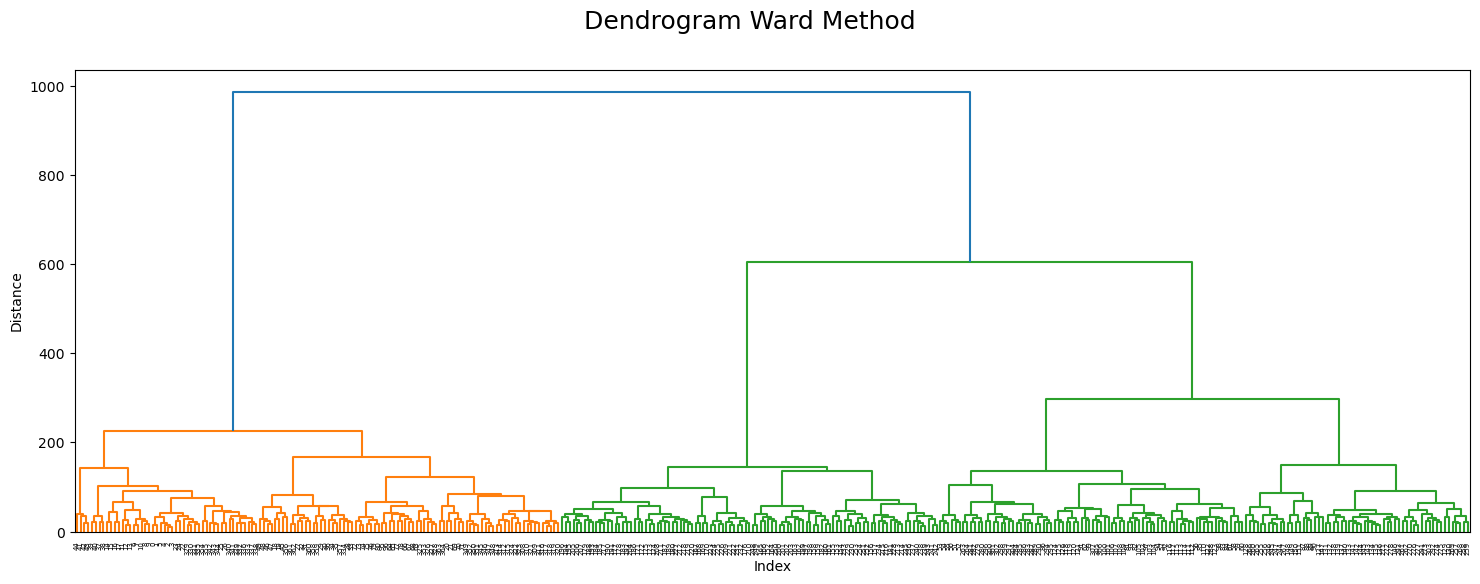

In [128]:
# Dendrogram Ward Method
distance_ward = linkage(df_unscaled, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## .04 Run Hierarchical Clustering on Scaled Data

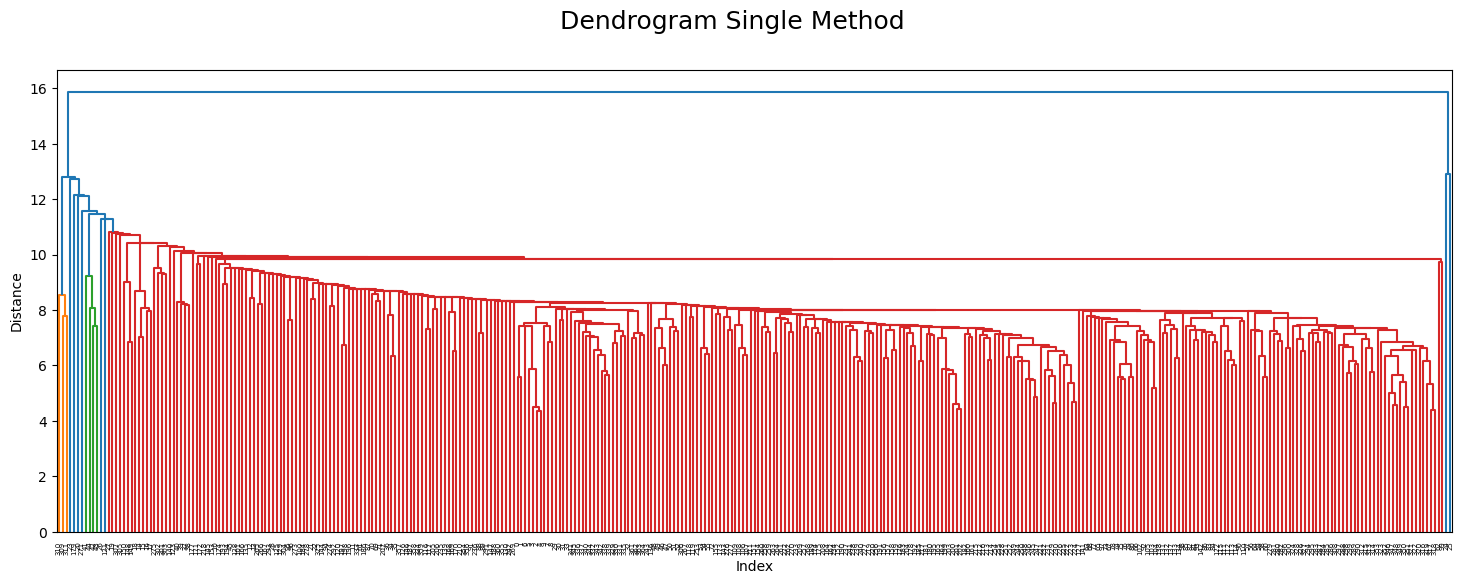

In [131]:
# Dendrogram Single Method
distance_single = linkage(df_scaled_nodate, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

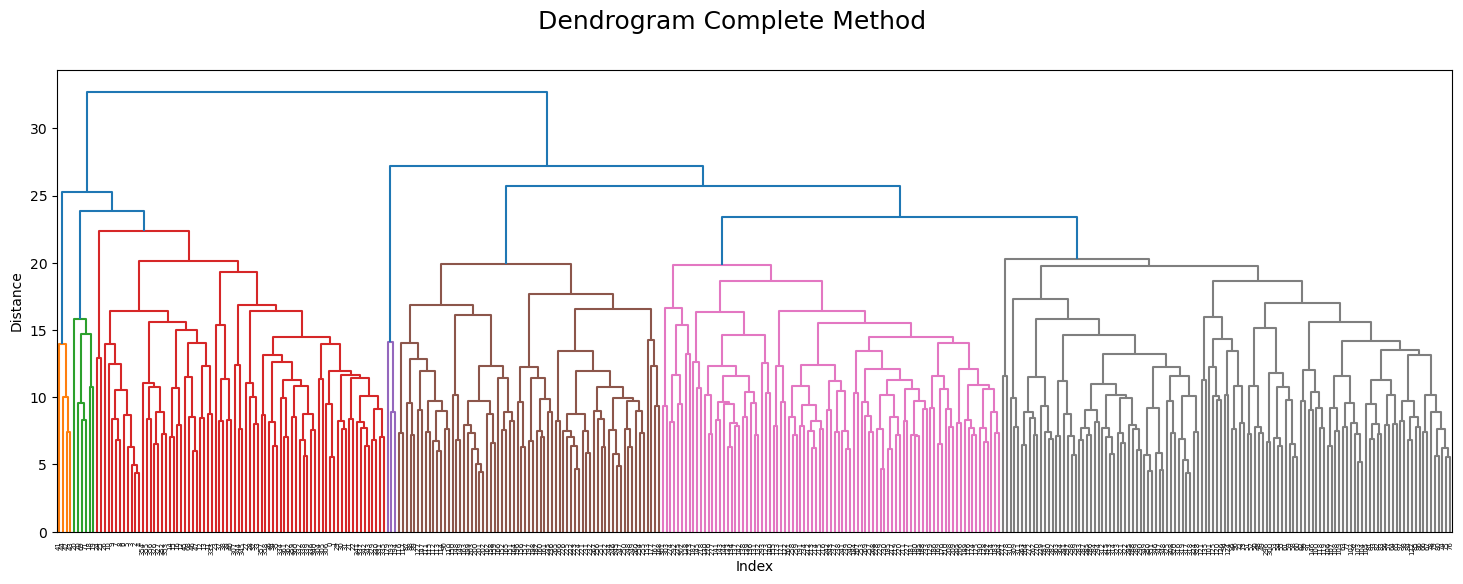

In [133]:
# Dendrogram Complete Method
distance_complete = linkage(df_scaled_nodate, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

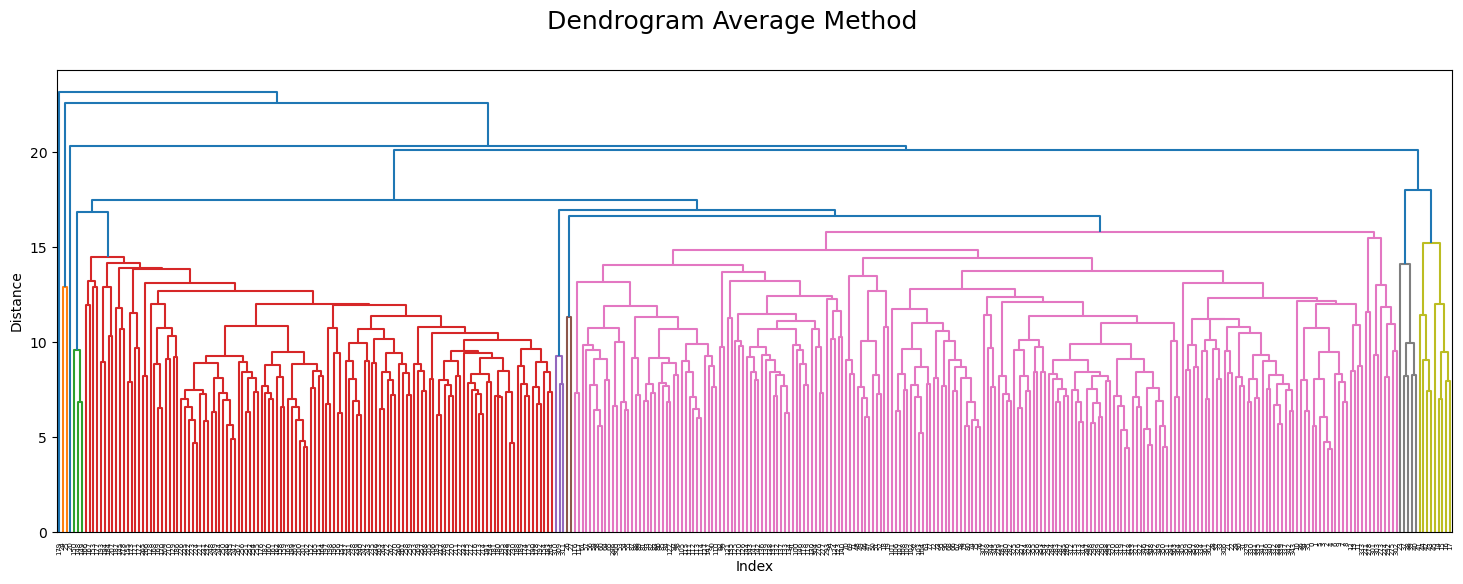

In [135]:
# Dendrogram Average Method
distance_average = linkage(df_scaled_nodate, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

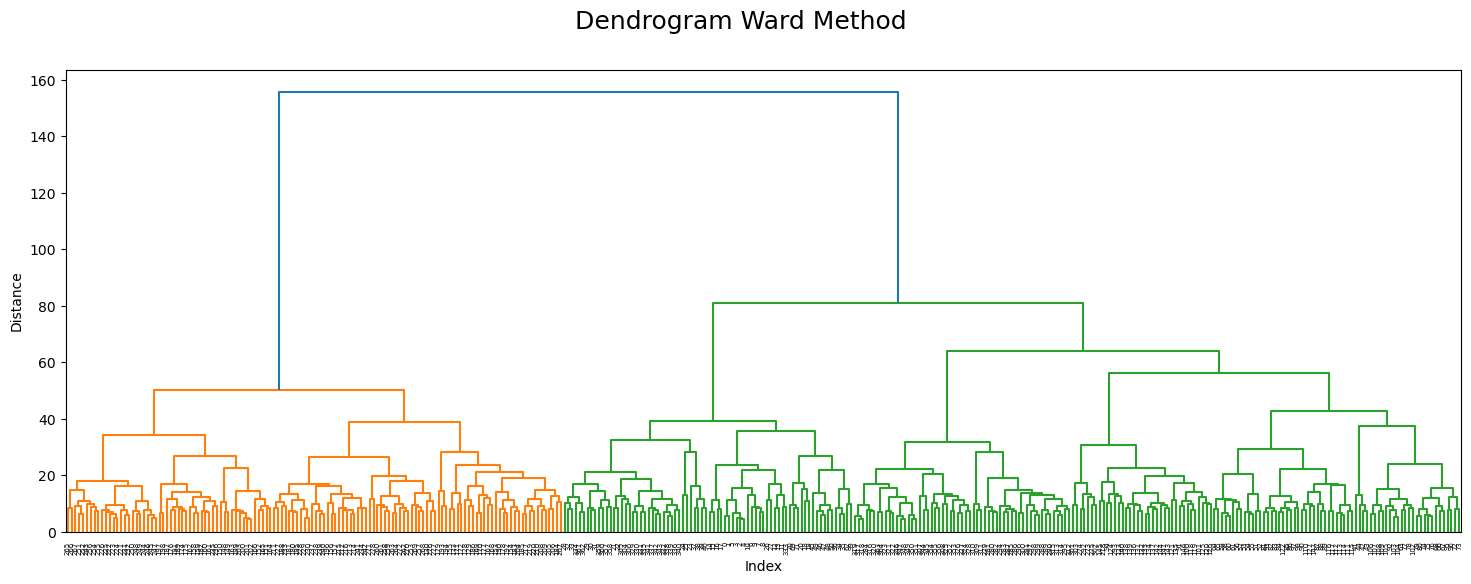

In [137]:
# Dendrogram Ward Method
distance_ward = linkage(df_scaled_nodate, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## .05 Principal Component Analysis

In [140]:
#Run the PCA model on scaled data, reducing to 9 components, the average number of variables per location
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df_scaled_nodate)

In [142]:
principalComponents

array([[-9.20063006, -2.57046102, -0.41854146, ..., -0.59859118,
        -3.29766055, -2.21617335],
       [-9.13153864, -2.59774258,  0.4682521 , ..., -0.60053382,
        -4.05060022, -1.07912474],
       [-9.22354476, -0.994027  ,  0.84110646, ...,  0.79965769,
        -0.36260832, -0.75757991],
       ...,
       [-7.19308387, -5.15091555,  1.99533868, ...,  1.31145128,
         3.55688826,  1.48851621],
       [-5.31388777, -3.87278231,  4.07722108, ...,  1.55152605,
         2.7120037 ,  0.51050279],
       [-3.63067907, -0.40086276,  4.46158518, ..., -0.17341899,
         1.6494578 , -0.73995407]])

In [144]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])

In [146]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-9.200630,-2.570461,-0.418541,1.451146,0.067696,-1.847612,-0.598591,-3.297661,-2.216173
1,-9.131539,-2.597743,0.468252,2.687209,1.032417,-0.932324,-0.600534,-4.050600,-1.079125
2,-9.223545,-0.994027,0.841106,2.213708,0.973001,-1.773679,0.799658,-0.362608,-0.757580
3,-9.487013,-0.880223,0.217800,2.182681,1.490636,-1.297038,0.466271,0.003608,-0.858490
4,-9.701805,-0.484532,0.906126,1.803398,1.512309,-1.959710,0.521956,-0.450960,-1.069564
...,...,...,...,...,...,...,...,...,...
360,-8.635727,-4.738731,-0.733764,-2.453543,-4.301097,-2.047054,2.171865,3.483712,-0.042638
361,-7.586197,-6.429407,-1.087582,-2.764975,-2.563974,0.905971,1.008157,3.607582,1.189116
362,-7.193084,-5.150916,1.995339,-1.996914,-1.953393,1.703269,1.311451,3.556888,1.488516
363,-5.313888,-3.872782,4.077221,-3.577634,-0.972065,3.820332,1.551526,2.712004,0.510503


## .06 Export PCA Data

In [149]:
dfPCA.to_csv(os.path.join(path, 'PCA_2021.csv'), index=False)